In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
df = pd.read_csv('C:/Users/phuoc/Desktop/Traffic_Prediction_Dataset/data/TrafficTwoMonth.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [11]:
# Các cột đặc trưng và nhãn
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
Y = df['Traffic Situation']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


In [12]:
# Tạo một cây quyết định đơn giản làm base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Khởi tạo AdaBoost
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,  # Sử dụng 'estimator' thay vì 'base_estimator'
    n_estimators=50,           # Số lượng mô hình con
    learning_rate=1.0,         # Tốc độ học
    random_state=42
)

# Huấn luyện mô hình
adaboost_model.fit(X_train, Y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [13]:
# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Độ chính xác
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f"Độ chính xác trên tập huấn luyện: {train_accuracy * 100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Báo cáo chi tiết
print("Classification Report:")
print(classification_report(Y_test, y_test_pred))

# Ma trận nhầm lẫn
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred))


Độ chính xác trên tập huấn luyện: 81.45%
Độ chính xác trên tập kiểm tra: 81.30%
Classification Report:
              precision    recall  f1-score   support

       heavy       0.99      1.00      1.00       341
        high       1.00      0.27      0.42       112
         low       0.00      0.00      0.00       250
      normal       0.77      1.00      0.87      1083

    accuracy                           0.81      1786
   macro avg       0.69      0.57      0.57      1786
weighted avg       0.72      0.81      0.74      1786

Confusion Matrix:
[[ 341    0    0    0]
 [   0   30    0   82]
 [   0    0    0  250]
 [   2    0    0 1081]]


c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

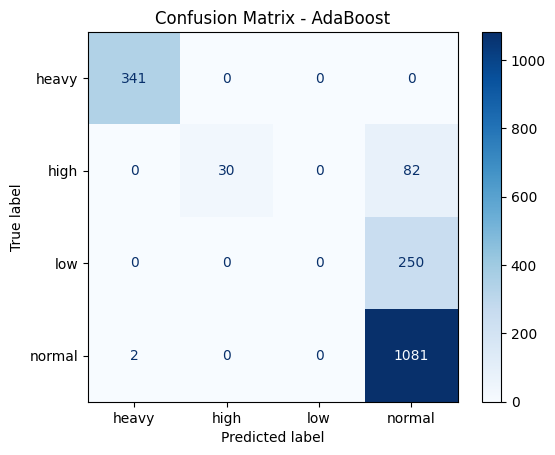

In [16]:
# Dự đoán trên tập kiểm tra
y_pred = adaboost_model.predict(X_test)

# Tạo confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - AdaBoost")
plt.show()